# Reverse Learning- Loan Prediction

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [276]:
import pickle
%matplotlib inline

In [277]:
df = pd.read_csv('loan_data_set.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [278]:
df.shape

(614, 13)

In [279]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002448,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [281]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [282]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [283]:
df.dropna(how="any",inplace=True)

In [284]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [285]:
df.drop("Loan_ID", axis=1, inplace=True)

In [286]:
from sklearn.preprocessing import LabelEncoder

In [287]:
le = LabelEncoder()
cols = df.columns.tolist()
for column in cols:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [288]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


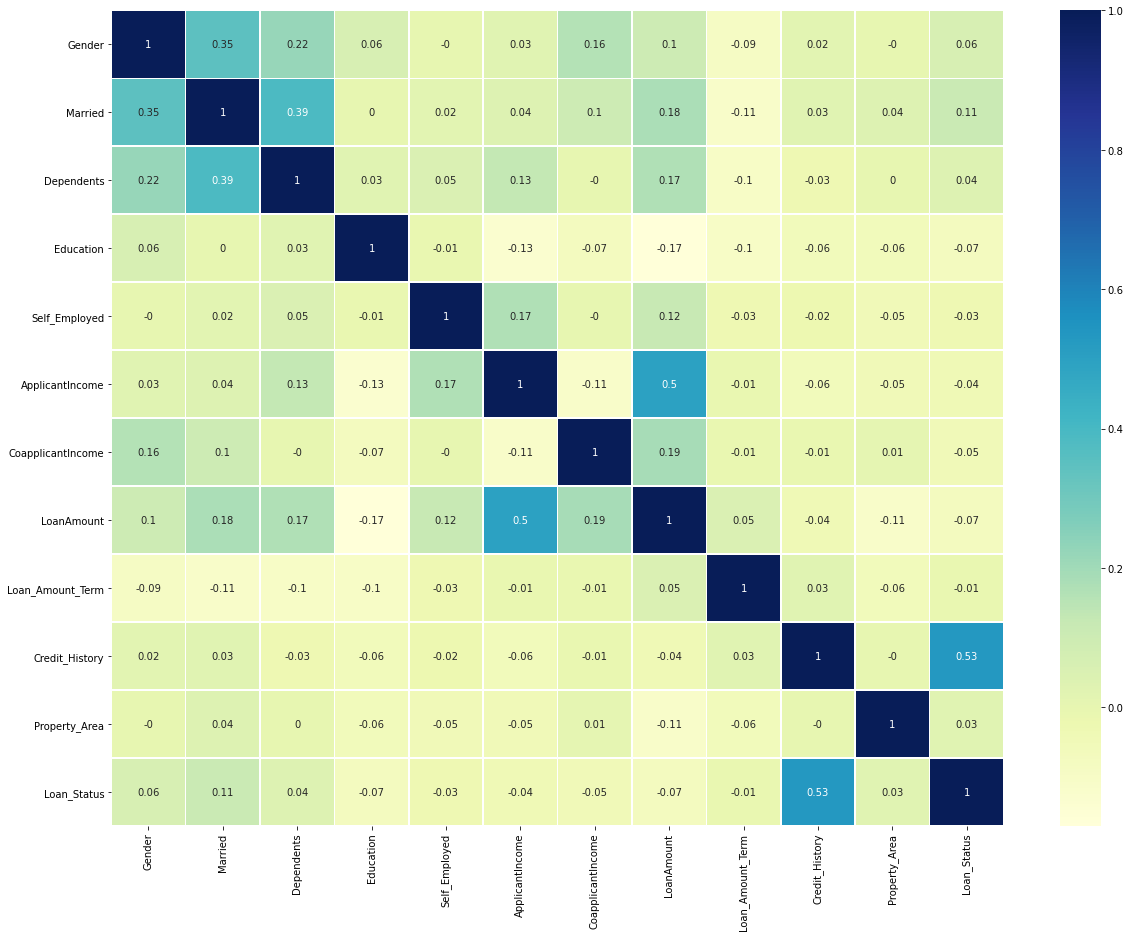

In [289]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

In [290]:
# def plot_feature_importance(importance,names,model_type):

#     #Create arrays from feature importance and feature names
#     feature_importance = np.array(importance)
#     feature_names = np.array(names)

#     #Create a DataFrame using a Dictionary
#     data={'feature_names':feature_names,'feature_importance':feature_importance}
#     fi_df = pd.DataFrame(data)

#     #Sort the DataFrame in order decreasing feature importance
#     fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#     #Define size of bar plot
#     plt.figure(figsize=(10,8))
#     #Plot Searborn bar chart
#     sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#     #Add chart labels
#     plt.title(model_type + ' FEATURE IMPORTANCE')
#     plt.xlabel('FEATURE IMPORTANCE')
#     plt.ylabel('FEATURE NAMES')

In [291]:
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost.sklearn import XGBClassifier
# import xgboost

In [292]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [293]:


# gb_m = GradientBoostingClassifier().fit(X, y)
# #gb_m = XGBClassifier().fit(X, y)

# plot_feature_importance(gb_m.feature_importances_, X.columns, 'GRADIENT BOOSTING')

In [294]:
y.shape

(480,)

In [295]:
# import shap
# shap.initjs()

In [296]:
# #Local Interpretation using SHAP (for prediction at id number 4776)
# explainer = shap.TreeExplainer(gb_m)
# shap_values = explainer.shap_values(X)

In [297]:
# shap_values[0]

In [298]:
# df.Loan_Status.loc[[1,60]]

In [299]:
# i = 1
# shap.force_plot(explainer.expected_value, shap_values[i], features=X.loc[i], feature_names=X.columns)

In [300]:
# i = 60
# shap.force_plot(explainer.expected_value, shap_values[i], features=X.loc[i], feature_names=X.columns)

In [301]:
# shap_norm = np.zeros(shap_values.shape)
# for i in range(len(shap_values)):
#     summ = 0
#     for j in range(11):
#         summ = summ + abs(shap_values[i][j])
#     shap_norm[i]= shap_values[i] / summ

In [302]:
# shap_norm

In [303]:
# df["FAI"] = abs(shap_norm[:,1] * 100)

In [304]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [305]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [306]:
# y_model = gb_m.predict(X)

In [307]:
# df["y_model"] = y_model

In [308]:
# df.loc[df['Gender'] == 1, 'FAI']

In [309]:
# #Gender = Male
# maleWeight = np.average(df.loc[((df['Gender'] == 1) & (df["y_model"] == 1)), 'FAI'])

# #Gender = Feale
# femaleWeight = np.average(df.loc[((df['Gender'] == 0) & (df["y_model"] == 1)), 'FAI'])

In [310]:
# maleWeight

In [311]:
# femaleWeight

In [312]:
# FS = (abs(abs(maleWeight)-abs(femaleWeight)) / max(maleWeight,femaleWeight))*100

In [313]:
# FairnessScore = 100 - FS

In [314]:

# print("Based on gender, getting loan- fairness score is: ", FairnessScore)

In [315]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

# GBClassifier 

---

**The Steps**

Step 1: Calculate the log of odds of y. This is also the first estimation of y. Here $n_1$ is the number of true values and $n_0$ of false values.
$$l_0(x)=\log \frac{n_1}{n_0}$$
For each $x_i$, the probability is:
$$p_{0i}=\frac{e^{l_{0i}}}{1+e^{l_{0i}}} $$
The prediction is:
$$
f_{0i}=\begin{cases}
0 & p_{0i}<0.5 \\
1 & p_{0i}>=0.5
\end{cases}
$$

Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=f_i-p_i$$
  * Step 2.2: Fit a regression tree $t_m(x)$ to pseudo-residuals and create terminal regions (leaves) $R_{jm}$ for $j=1...Jm$ <br />

  * Step 2.3: For each leaf of the tree, there are $p_j$ elements, compute $\gamma$ as following equation. <br />

$$\gamma_{im}=\frac{\sum r_{im}}{\sum (1-r_{im-1})(r_{im-1})} $$

  * (In practise, the regression tree will do this for us.)

  * Step 2.4: Update the log of odds with learning rate $\alpha$:
$$l_m(x)=l_{m-1}+\alpha \gamma_m$$

For each $x_i$, the probability is:
$$p_{mi}=\frac{e^{l_{mi}}}{1+e^{l_{mi}}} $$
The prediction is:
$$
f_{mi}=\begin{cases}
0 & p_{mi}<0.5 \\
1 & p_{mi}>=0.5
\end{cases}
$$


Step 3. Output $$f_M(x)$$

---

The loss function over log of odds:

$$L=-\sum_{i=1}^{N}(y\log(odds)-\log(1+e^{\log(odds)}))$$

In [316]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


import graphviz
import pylab
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [317]:
log_of_odds0=np.log(332 / 148)
probability0=np.exp(log_of_odds0)/(np.exp(log_of_odds0)+1)
print(f'the log_of_odds is : {log_of_odds0}')
print(f'the probability is : {probability0}')
predict0=1 #threshold 0.5
print(f'the prediction is : 1')
n_samples=480

loss0=-(y*np.log(probability0)+(1-y)*np.log(1-probability0))

the log_of_odds is : 0.8079226951523736
the probability is : 0.6916666666666667
the prediction is : 1


In [318]:
#now let's get started
n_times = 479
learning_rate=0.1
log_of_odds=np.zeros([n_times+1,n_samples])

residuals = np.zeros([n_times+1,n_samples])
loss = [0] * (n_times+1)
probabilities = np.zeros([n_times+1,n_samples])
predictions = np.zeros([n_times+1,n_samples])
score = np.zeros([n_times+1])
#calculation
log_of_odds[0] = [log_of_odds0] * n_samples
probabilities[0] = [probability0] * n_samples
predictions[0] = (probabilities[0]>0.5)*1.0
score[0]=np.sum(predictions[0]==y) / n_samples
residuals[0] = y - probabilities[0]
loss[0] = loss0.sum()
trees = []
gamma_value = np.zeros([n_times+1,8])
gamma = np.zeros([n_times+1,n_samples])

In [319]:
#Calling this function will perform single time itertion 
def iteration(i):
    #step 2.1 calculate the residuals
    residuals[i] = y - probabilities[i]
    #step 2.2 Fit a regression tree
    dt = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=7)
    dt=dt.fit(X, residuals[i])
    
    trees.append(dt.tree_)
    
    #Step 2.3 Calculate gamma
    leaf_indeces=dt.apply(X)
    #print(leaf_indeces)
    unique_leaves=np.unique(leaf_indeces)
    n_leaf=len(unique_leaves)
    #for leaf 1
    for ileaf in range(n_leaf):
        
        leaf_index=unique_leaves[ileaf]
        n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
        previous_probability = probabilities[i][leaf_indeces==leaf_index]
        denominator = np.sum(previous_probability * (1-previous_probability))
        igamma = dt.tree_.value[ileaf+1][0][0] * n_leaf / denominator
        gamma_value[i][ileaf]=igamma
        #print(f'for leaf {leaf_index}, we have {n_leaf} related samples. and gamma is {igamma}')

    gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
    #Step 2.4 Update F(x) 
    log_of_odds[i+1] = log_of_odds[i] + learning_rate * gamma[i]

    probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    predictions[i+1] = (probabilities[i+1]>0.5)*1.0
    score[i+1]=np.sum(predictions[i+1]==y) / n_samples
    #residuals[i+1] = y - probabilities[i+1]
    loss[i+1]=np.sum(-y * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))
    
    new_df=df.copy()
    new_df.columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
    new_df[f'$p{i}$']=probabilities[i]
    new_df[f'$l{i}$']=log_of_odds[i]
    new_df[f'$r{i}$']=residuals[i]
    new_df[f'$\gamma{i}$']=gamma[i]
    new_df[f'$l{i+1}$']=log_of_odds[i+1]
    new_df[f'$p{i+1}$']=probabilities[i+1]
    #display(new_df)
    
    dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,feature_names=X.columns) 
    graph = graphviz.Source(dot_data) 
    display(graph)
    display(new_df)

In [320]:
#Calling this function will perform n time itertion 
def iteration_n(n):
    df_collection = {} 
    for i in range(n+1):
        j = i+1 #this variable is for dataframe indexing only
        #step 2.1 calculate the residuals
        residuals[i] = y - probabilities[i]
        #step 2.2 Fit a regression tree
        dt = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=7)
        dt=dt.fit(X, residuals[i])

        trees.append(dt.tree_)

        #Step 2.3 Calculate gamma
        leaf_indeces=dt.apply(X)
        #print(leaf_indeces)
        unique_leaves=np.unique(leaf_indeces)
        n_leaf=len(unique_leaves)
        #for leaf 1
        for ileaf in range(n_leaf):

            leaf_index=unique_leaves[ileaf]
            n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
            previous_probability = probabilities[i][leaf_indeces==leaf_index]
            denominator = np.sum(previous_probability * (1-previous_probability))
            igamma = dt.tree_.value[ileaf+1][0][0] * n_leaf / denominator
            gamma_value[i][ileaf]=igamma
            #print(f'for leaf {leaf_index}, we have {n_leaf} related samples. and gamma is {igamma}')

        gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
        #Step 2.4 Update F(x) 
        log_of_odds[i+1] = log_of_odds[i] + learning_rate * gamma[i]

        probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
        predictions[i+1] = (probabilities[i+1]>0.5)*1.0
        score[i+1]=np.sum(predictions[i+1]==y) / n_samples
        #residuals[i+1] = y - probabilities[i+1]
        loss[i+1]=np.sum(-y * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))

        new_df=df.copy()
        new_df.columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
        new_df[f'$p{i}$']=probabilities[i]
        new_df[f'$l{i}$']=log_of_odds[i]
        new_df[f'$r{i}$']=residuals[i]
        new_df[f'$\gamma{i}$']=gamma[i]
        new_df[f'$l{j}$']=log_of_odds[i+1]
        new_df[f'$p{j}$']=probabilities[i+1]
        #display(new_df)
        df_collection[i] = new_df

        dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,feature_names=X.columns) 
        graph = graphviz.Source(dot_data) 
        #display the last dataframe and tree
        print("Iteration: ",i,"\nTree :",i+1,"-"*80)
        display(graph)
        filename = graph.render(filename='img/g1')
        pylab.savefig('DT.png',dpi=300)
        #display(new_df)
    return df_collection,loss,score

In [321]:
#iteration(0)

In [322]:
#iteration(1)

In [323]:
#iteration(2)

In [324]:
#iteration(3)

In [325]:
#iteration(4)

In [326]:
#iteration(5)

In [327]:
#iteration_n(70)

In [328]:
#plt.plot(score)
#plt.show()

In [329]:
#plt.plot(loss)
#plt.show()

Iteration:  0 
Tree : 1 --------------------------------------------------------------------------------


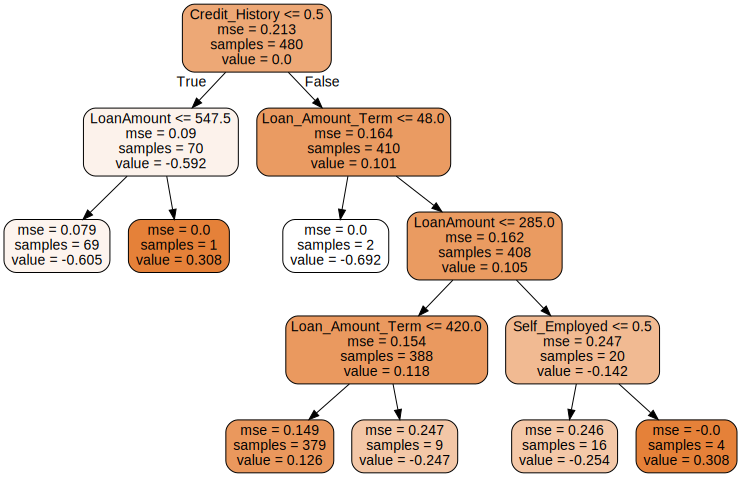

Iteration:  1 
Tree : 2 --------------------------------------------------------------------------------


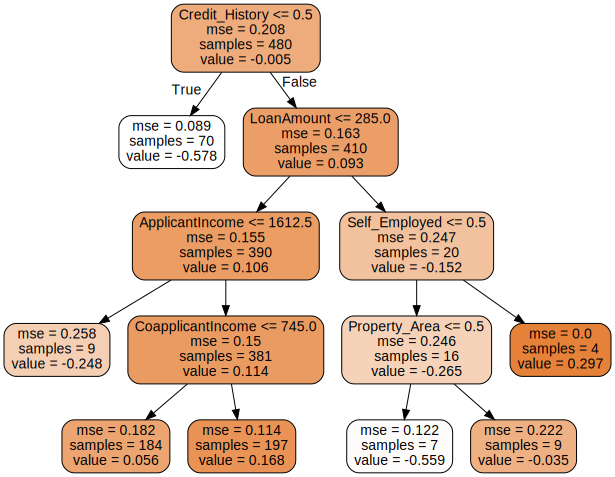

Iteration:  2 
Tree : 3 --------------------------------------------------------------------------------


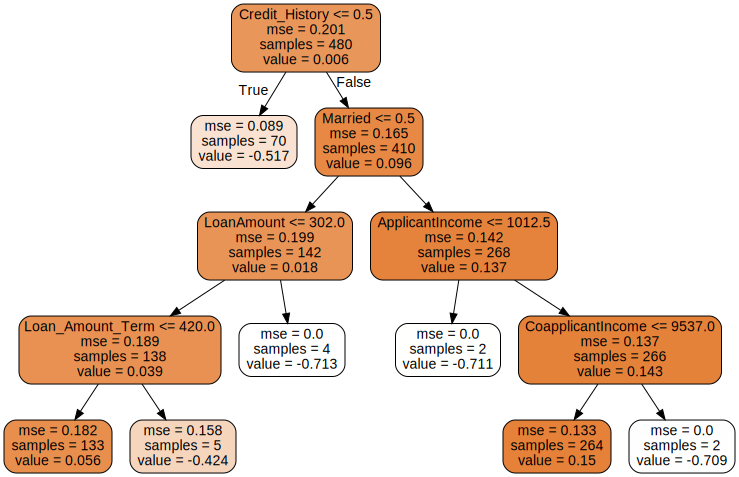

Iteration:  3 
Tree : 4 --------------------------------------------------------------------------------


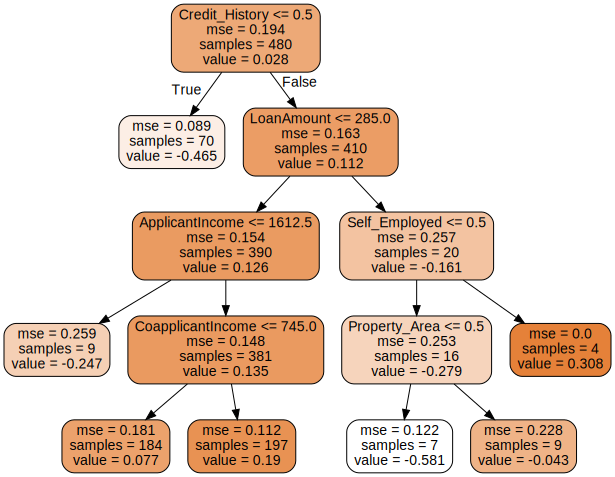

Iteration:  4 
Tree : 5 --------------------------------------------------------------------------------


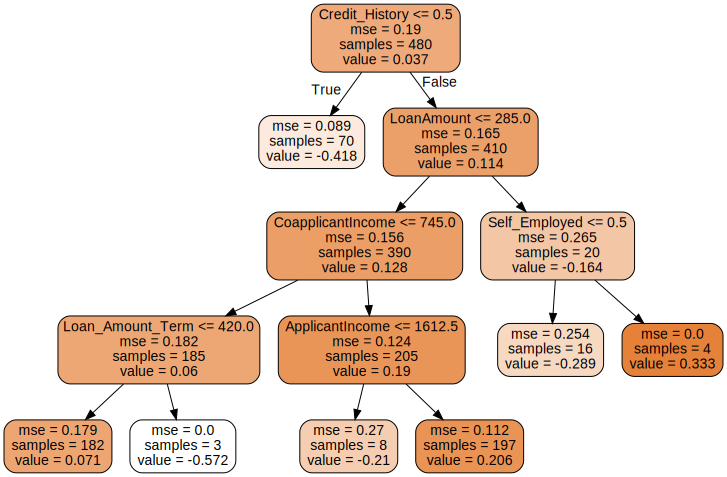

Iteration:  5 
Tree : 6 --------------------------------------------------------------------------------


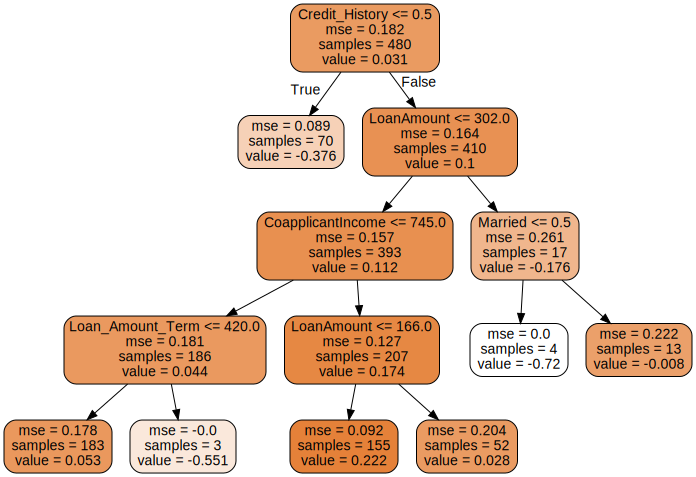

Iteration:  6 
Tree : 7 --------------------------------------------------------------------------------


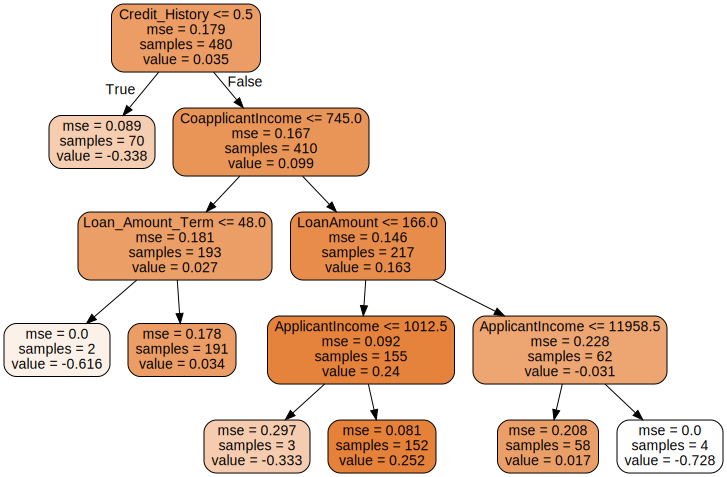

Iteration:  7 
Tree : 8 --------------------------------------------------------------------------------


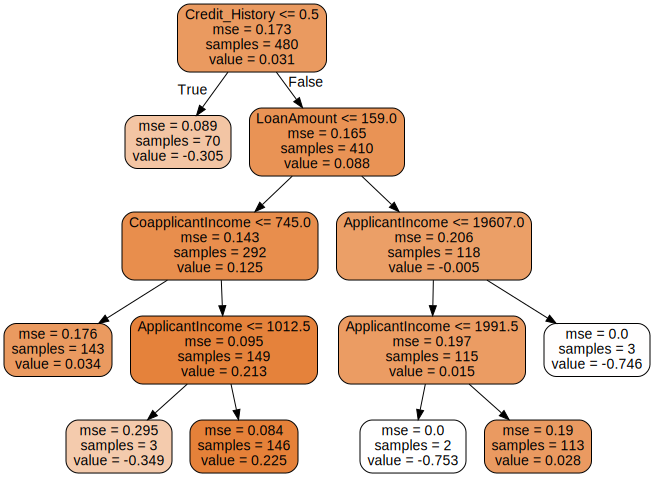

Iteration:  8 
Tree : 9 --------------------------------------------------------------------------------


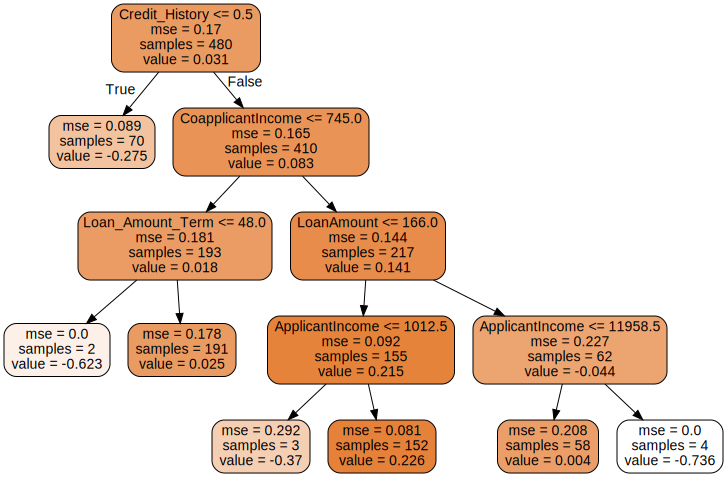

Iteration:  9 
Tree : 10 --------------------------------------------------------------------------------


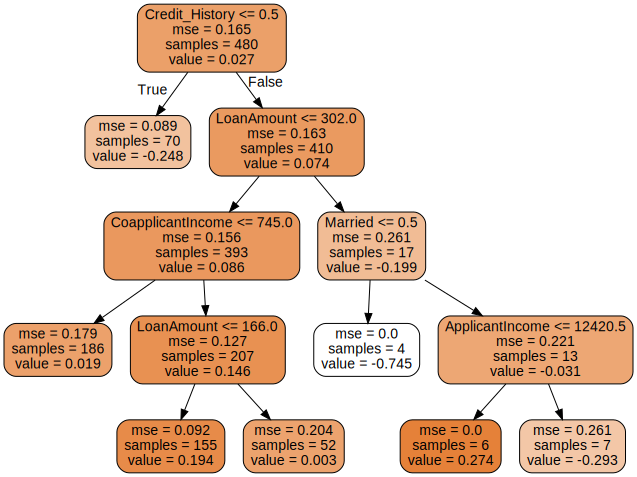

Iteration:  10 
Tree : 11 --------------------------------------------------------------------------------


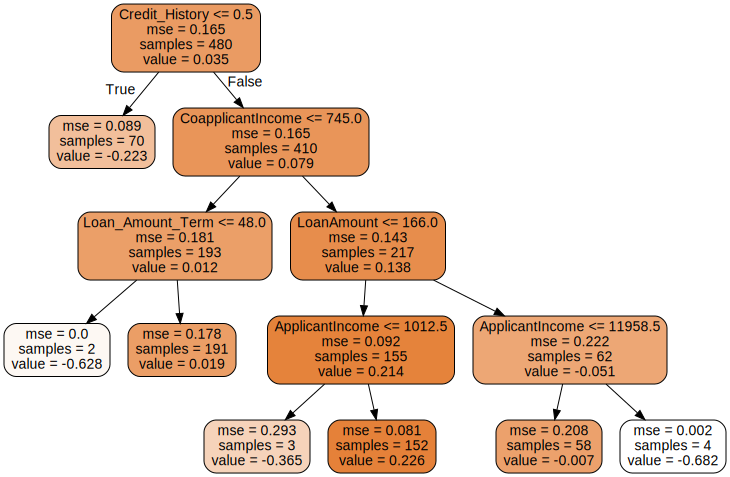

Iteration:  11 
Tree : 12 --------------------------------------------------------------------------------


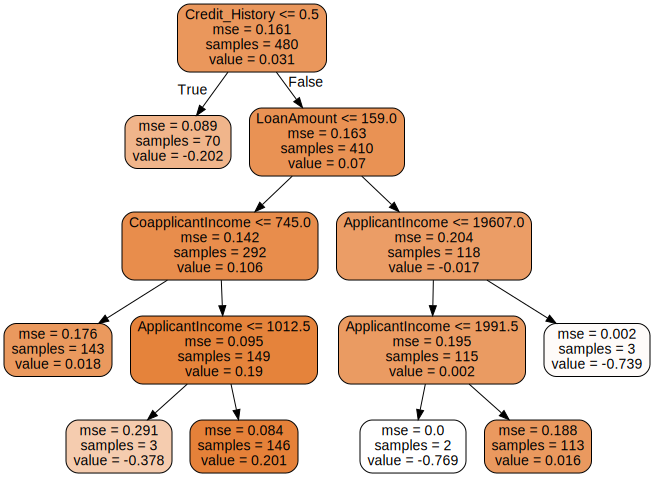

Iteration:  12 
Tree : 13 --------------------------------------------------------------------------------


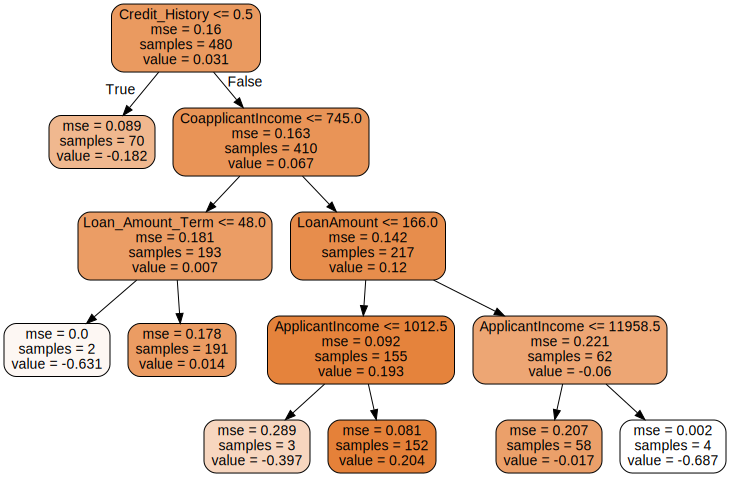

Iteration:  13 
Tree : 14 --------------------------------------------------------------------------------


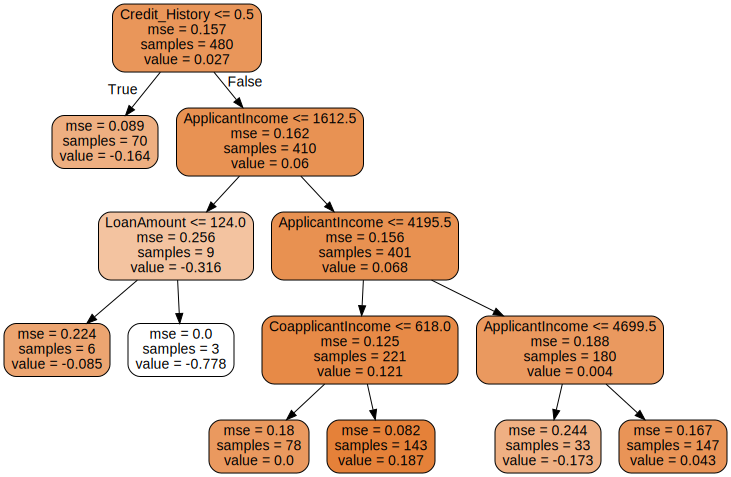

Iteration:  14 
Tree : 15 --------------------------------------------------------------------------------


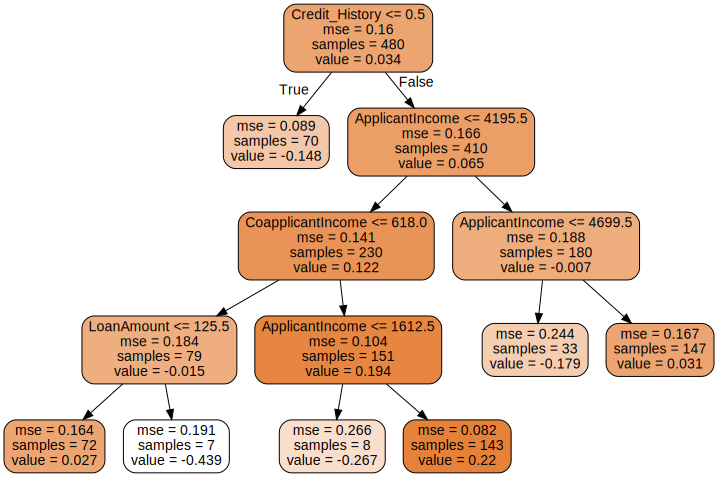

Iteration:  15 
Tree : 16 --------------------------------------------------------------------------------


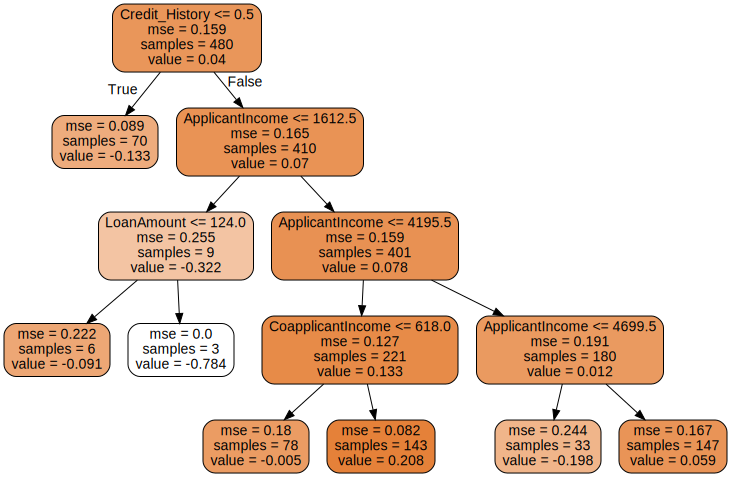

Iteration:  16 
Tree : 17 --------------------------------------------------------------------------------


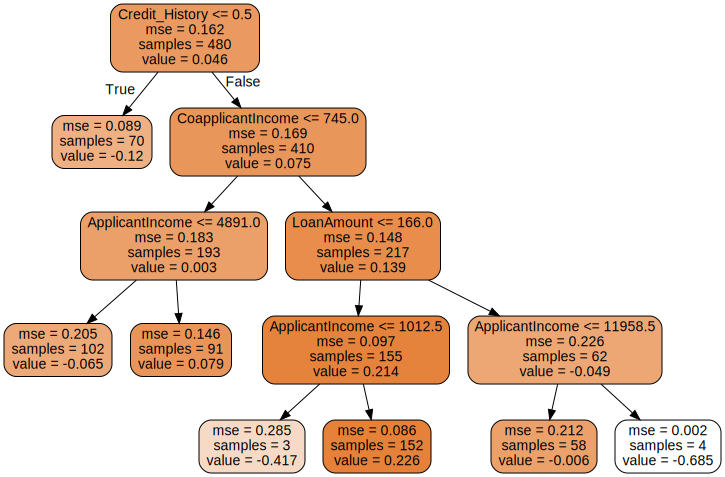

Iteration:  17 
Tree : 18 --------------------------------------------------------------------------------


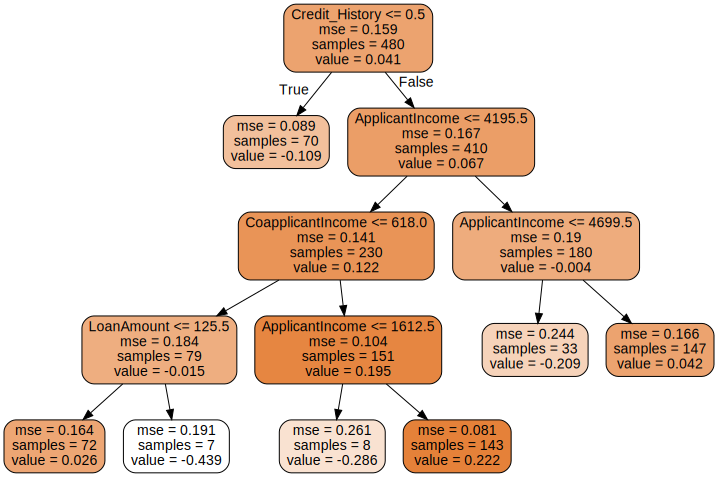

Iteration:  18 
Tree : 19 --------------------------------------------------------------------------------


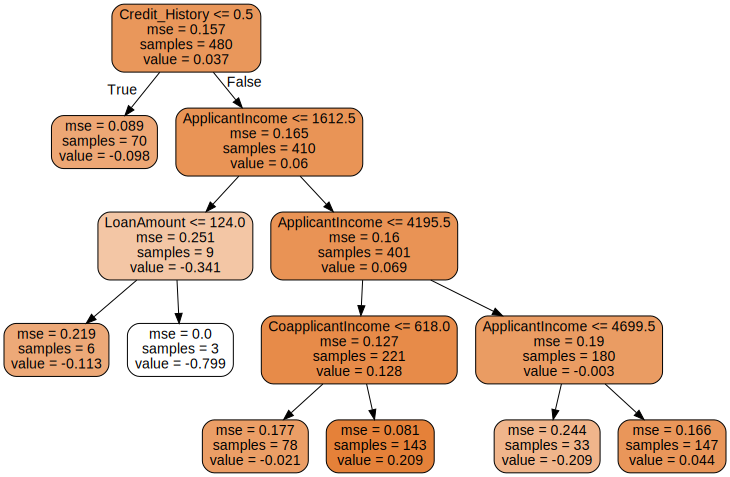

Iteration:  19 
Tree : 20 --------------------------------------------------------------------------------


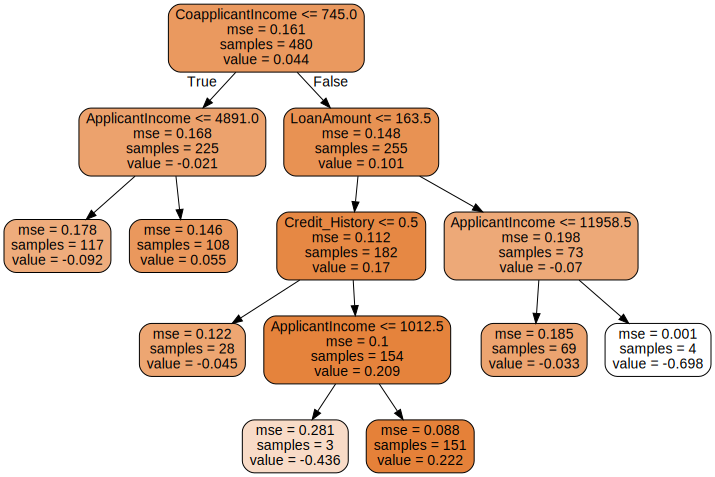

Iteration:  20 
Tree : 21 --------------------------------------------------------------------------------


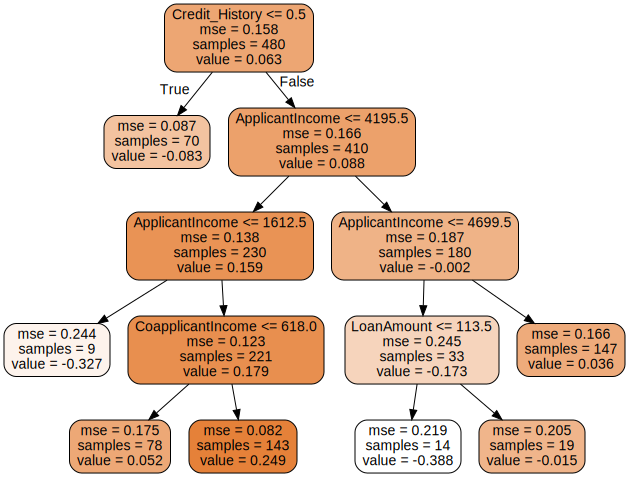

Iteration:  21 
Tree : 22 --------------------------------------------------------------------------------


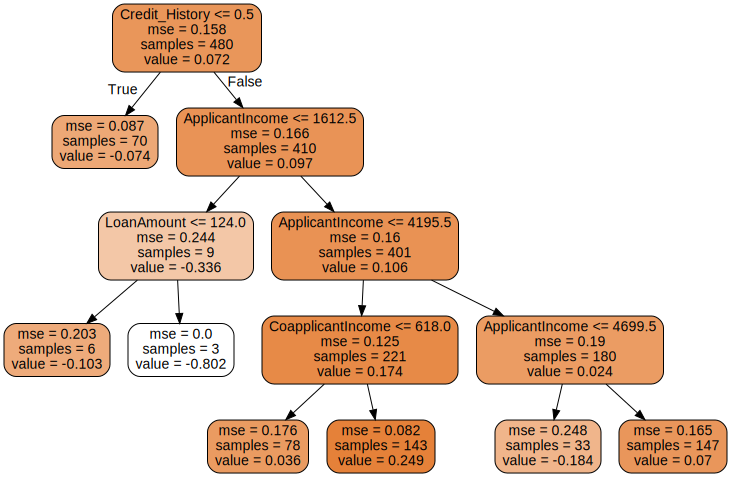

Iteration:  22 
Tree : 23 --------------------------------------------------------------------------------


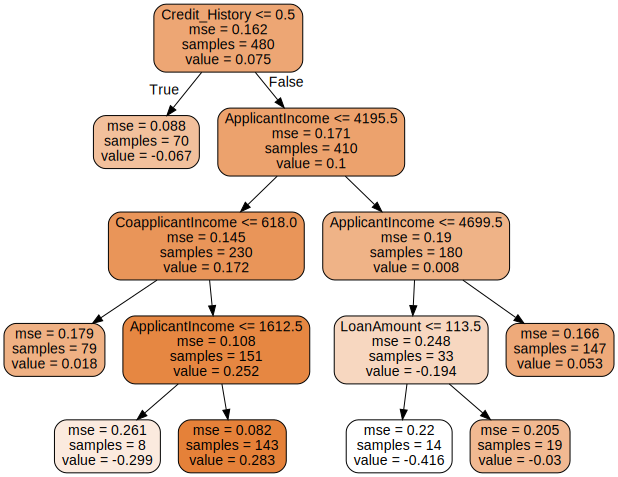

Iteration:  23 
Tree : 24 --------------------------------------------------------------------------------


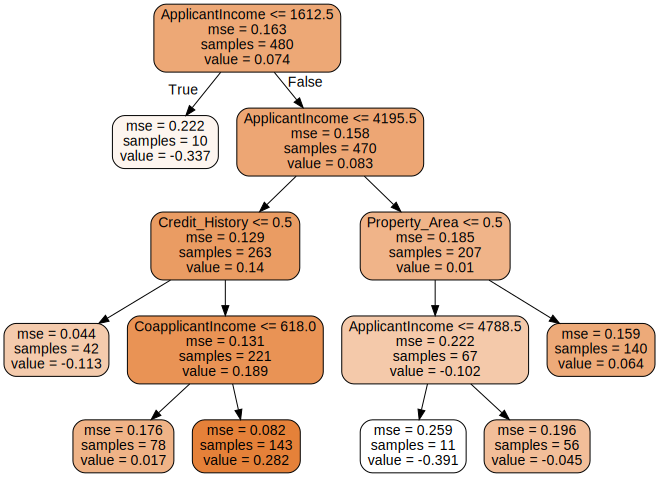

Iteration:  24 
Tree : 25 --------------------------------------------------------------------------------


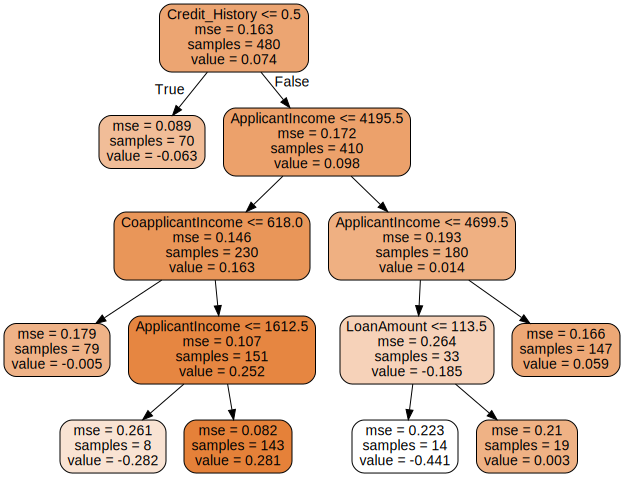

Iteration:  25 
Tree : 26 --------------------------------------------------------------------------------


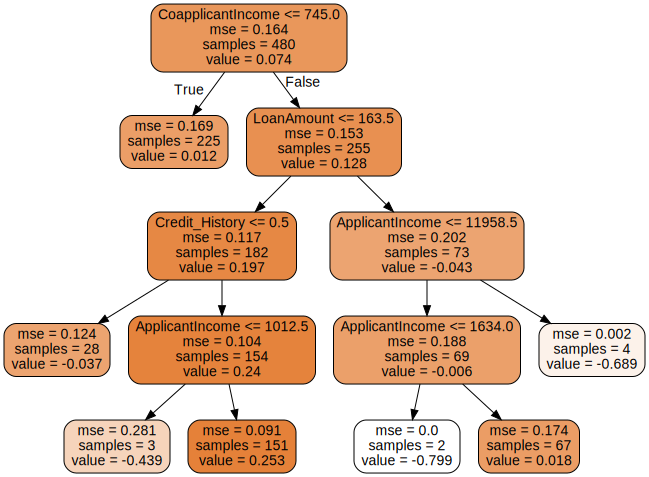

Iteration:  26 
Tree : 27 --------------------------------------------------------------------------------


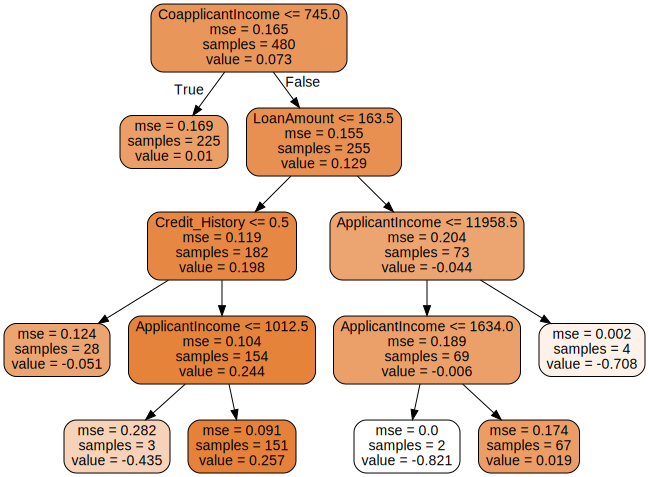

Iteration:  27 
Tree : 28 --------------------------------------------------------------------------------


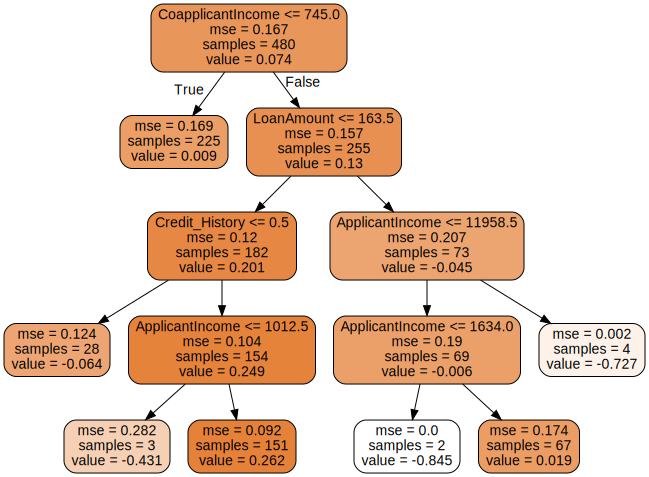

Iteration:  28 
Tree : 29 --------------------------------------------------------------------------------


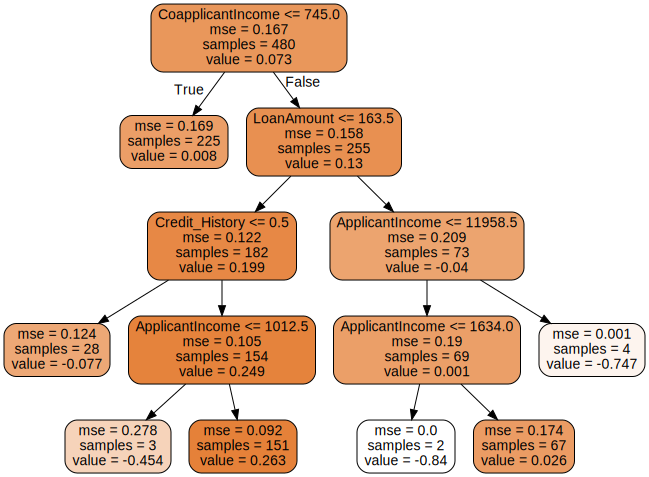

Iteration:  29 
Tree : 30 --------------------------------------------------------------------------------


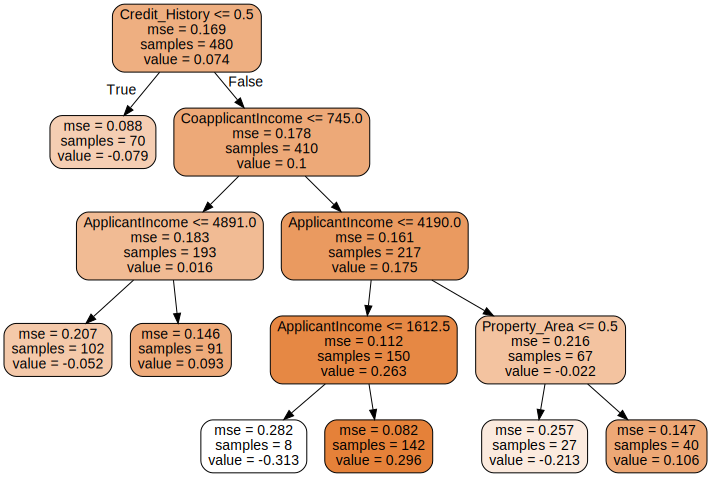

Iteration:  30 
Tree : 31 --------------------------------------------------------------------------------


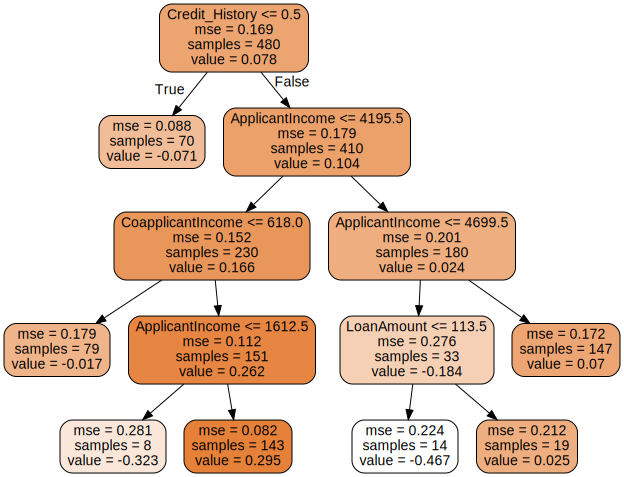

Iteration:  31 
Tree : 32 --------------------------------------------------------------------------------


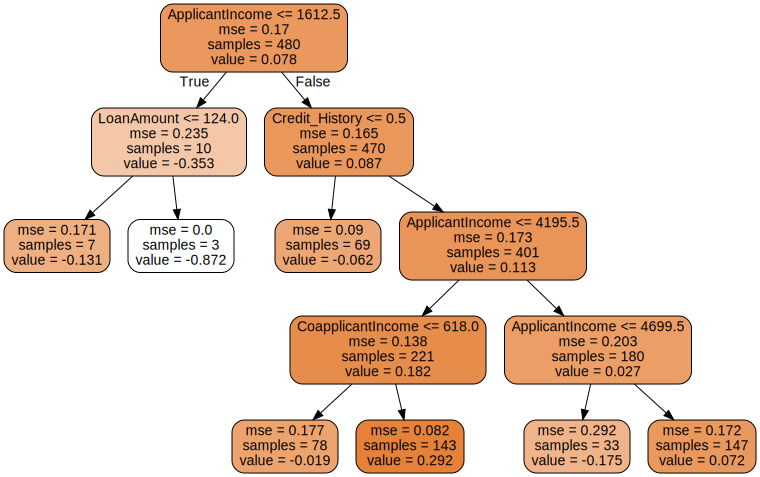

Iteration:  32 
Tree : 33 --------------------------------------------------------------------------------


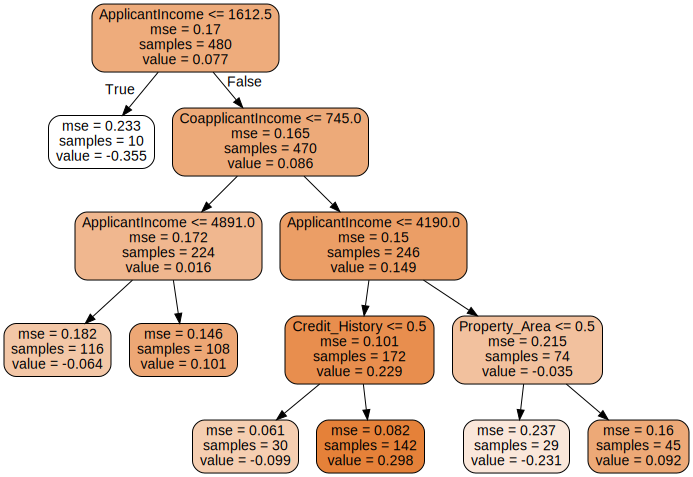

Iteration:  33 
Tree : 34 --------------------------------------------------------------------------------


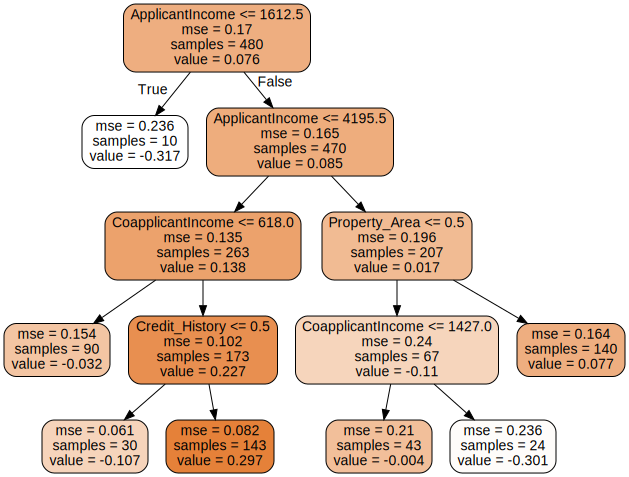

Iteration:  34 
Tree : 35 --------------------------------------------------------------------------------


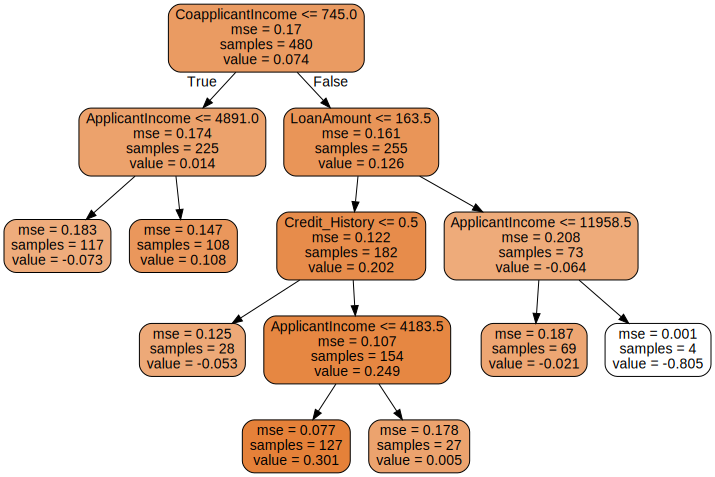

Iteration:  35 
Tree : 36 --------------------------------------------------------------------------------


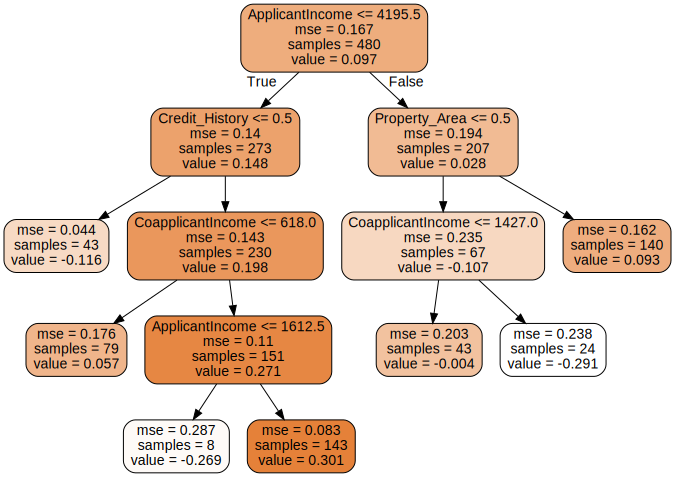

Iteration:  36 
Tree : 37 --------------------------------------------------------------------------------


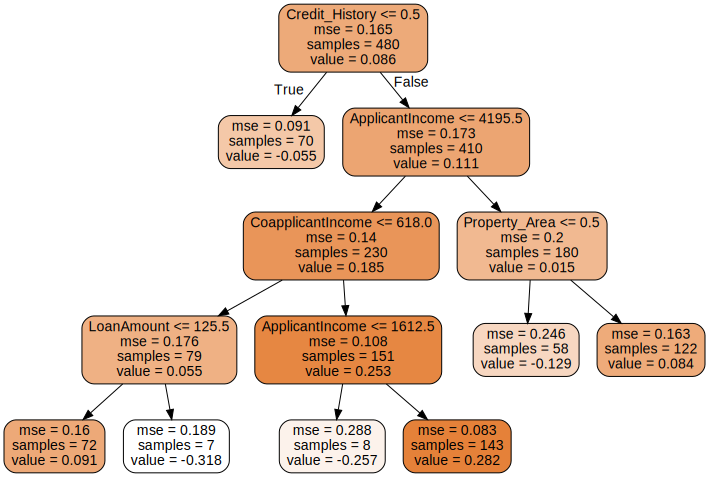

Iteration:  37 
Tree : 38 --------------------------------------------------------------------------------


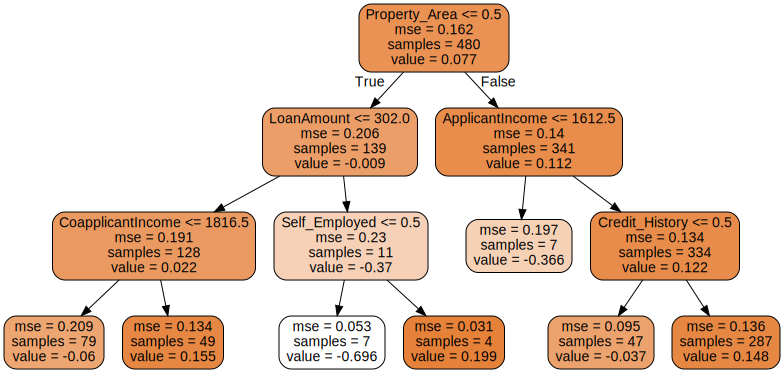

Iteration:  38 
Tree : 39 --------------------------------------------------------------------------------


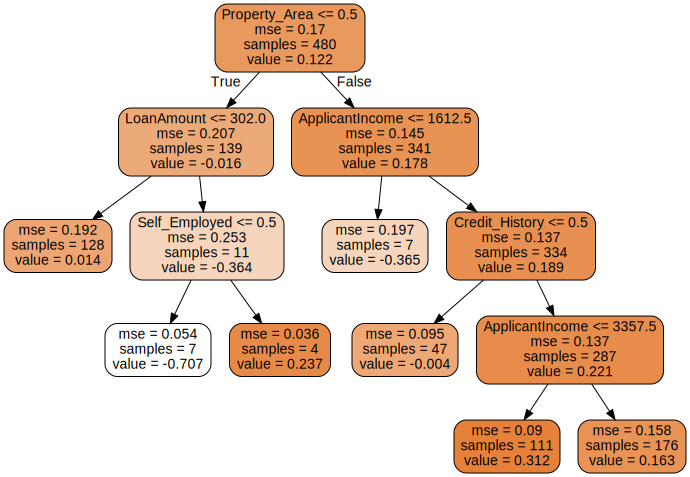

Iteration:  39 
Tree : 40 --------------------------------------------------------------------------------


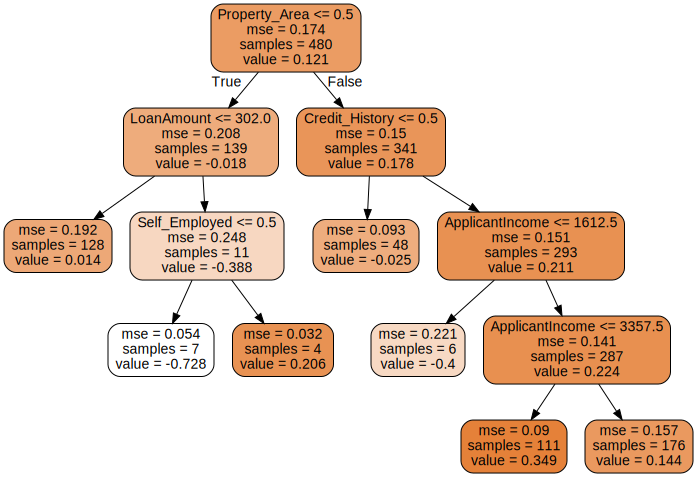

Iteration:  40 
Tree : 41 --------------------------------------------------------------------------------


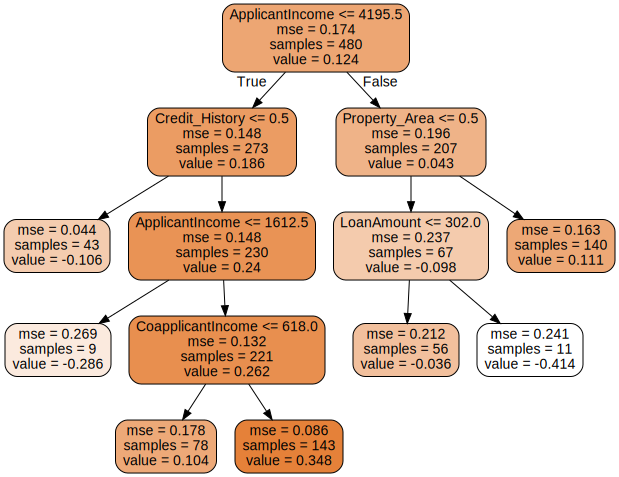

Iteration:  41 
Tree : 42 --------------------------------------------------------------------------------


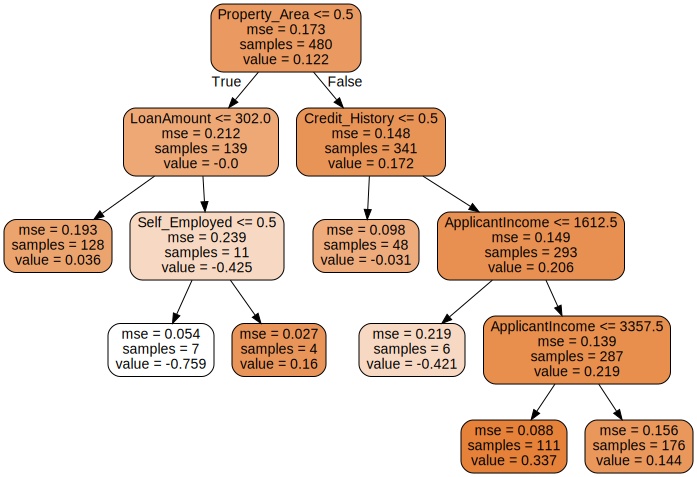

Iteration:  42 
Tree : 43 --------------------------------------------------------------------------------


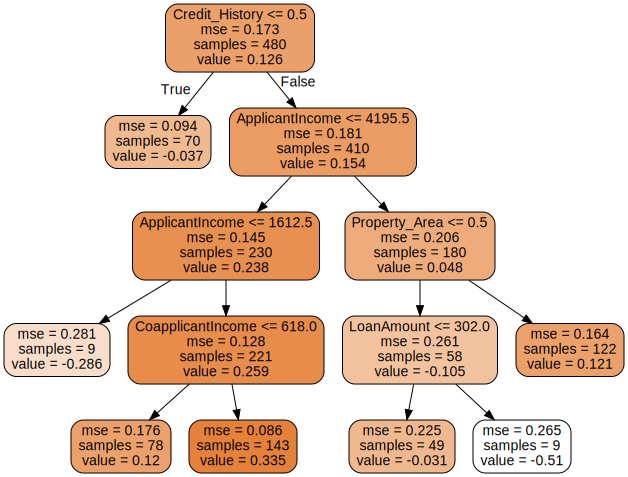

Iteration:  43 
Tree : 44 --------------------------------------------------------------------------------


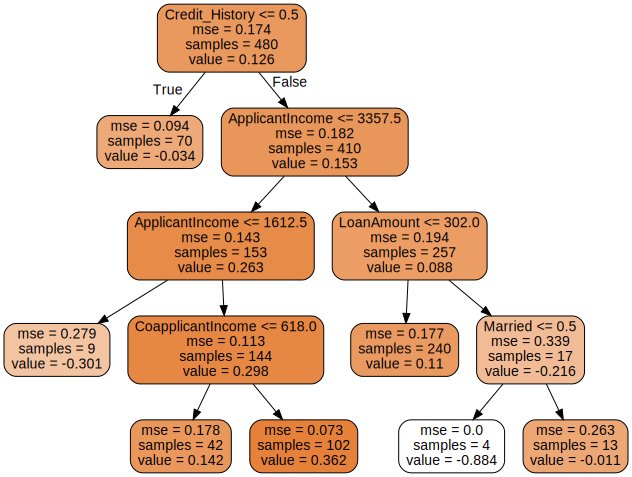

Iteration:  44 
Tree : 45 --------------------------------------------------------------------------------


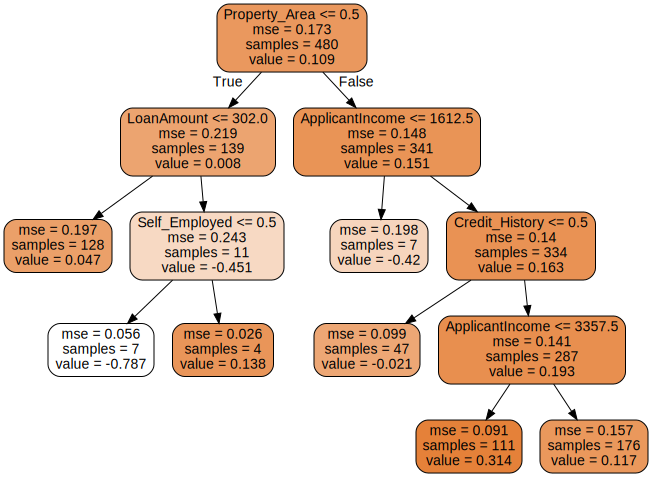

Iteration:  45 
Tree : 46 --------------------------------------------------------------------------------


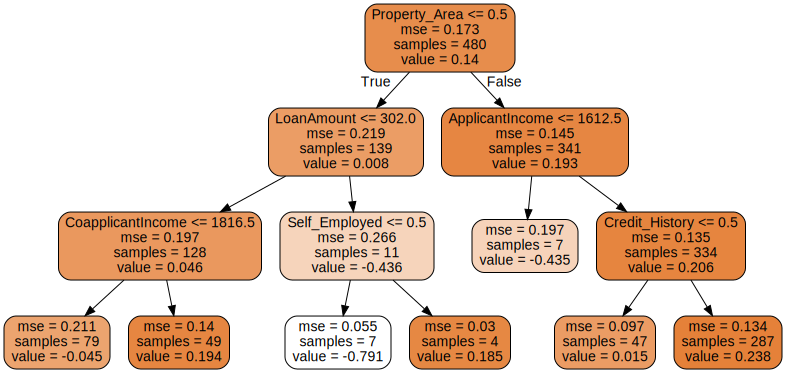

Iteration:  46 
Tree : 47 --------------------------------------------------------------------------------


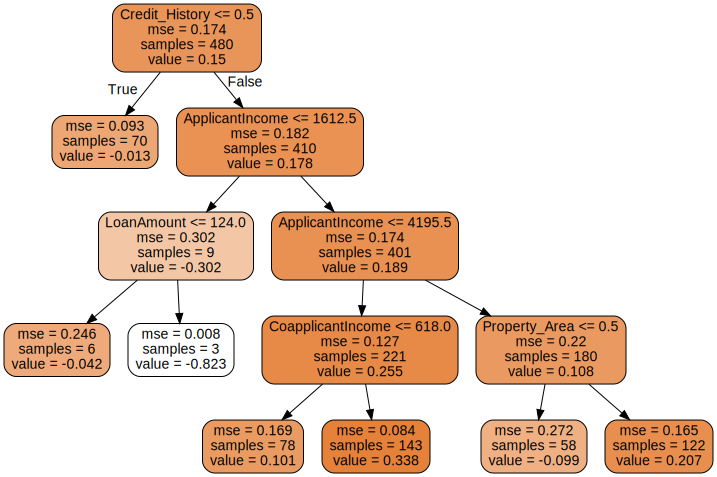

Iteration:  47 
Tree : 48 --------------------------------------------------------------------------------


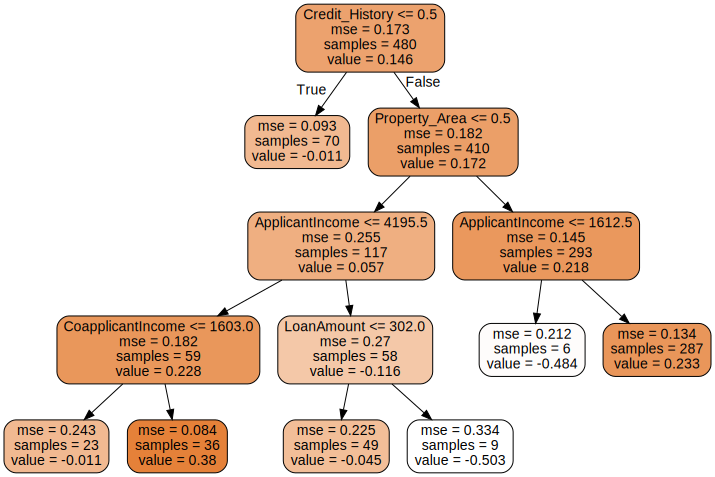

Iteration:  48 
Tree : 49 --------------------------------------------------------------------------------


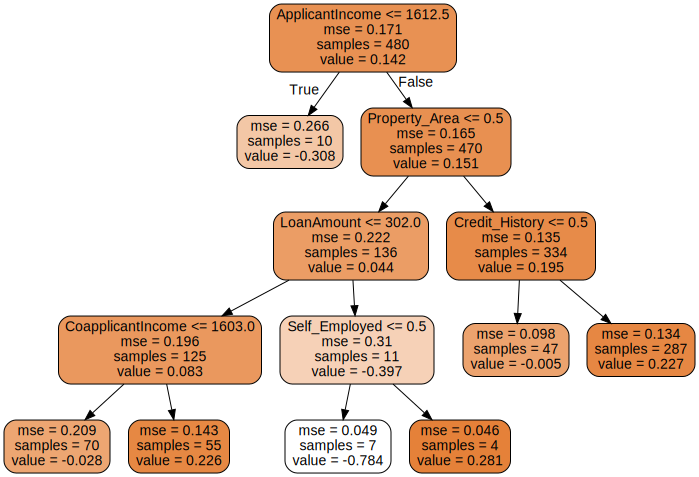

Iteration:  49 
Tree : 50 --------------------------------------------------------------------------------


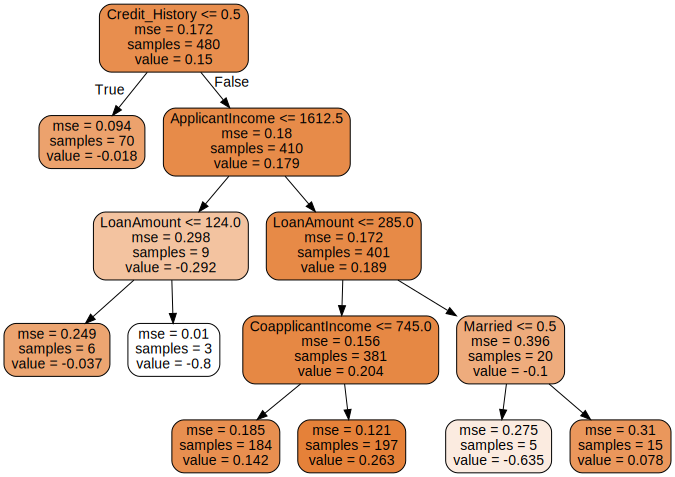

Iteration:  50 
Tree : 51 --------------------------------------------------------------------------------


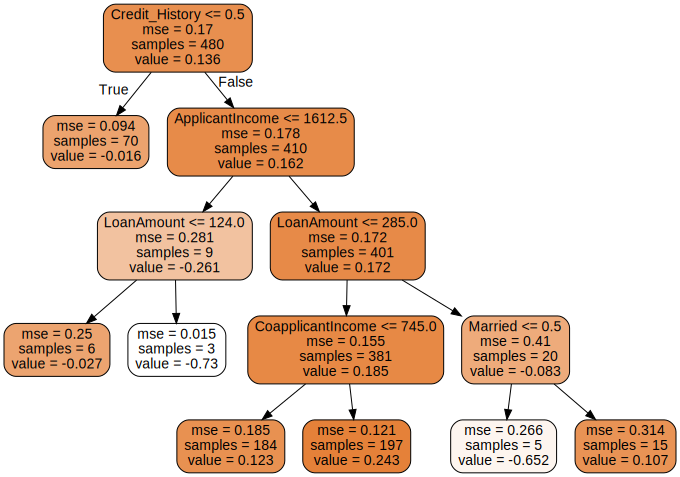

<Figure size 432x288 with 0 Axes>

In [330]:
#Performs n time iteration and saves all the values in a collection of dataframe
df_collection,Loss,Score = iteration_n(50)

In [331]:
# plt.plot(Score[0:52])
# plt.show()
Loss.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

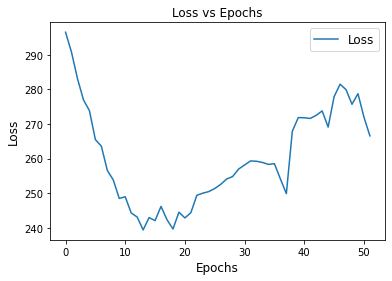

In [332]:
plt.figure(figsize=(6,4))
plt.plot(Loss[0:52],label="Loss")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.title("Loss vs Epochs", fontsize = 12)
plt.legend(labels=['Loss'],fontsize = 12)
plt.savefig('LOSS.png', dpi=300)  
plt.show()


In [333]:
min(Loss[0:52])
    

239.36612797772668

In [334]:
from pandas import DataFrame

df = DataFrame (Loss[0:52],columns=['Loss'])
df

,Loss
0,296.525104
1,290.745291
2,283.118515
3,276.988504
4,273.859793
5,265.476853
6,263.578092
7,256.581889
8,253.808768
9,248.463202


In [335]:
df.min(axis = 1)

0     296.525104
1     290.745291
2     283.118515
3     276.988504
4     273.859793
5     265.476853
6     263.578092
7     256.581889
8     253.808768
9     248.463202
10    248.950557
11    244.278549
12    243.092622
13    239.366128
14    242.929995
15    242.060857
16    246.169616
17    242.307501
18    239.640142
19    244.497431
20    242.827537
21    244.354328
22    249.374491
23    249.989777
24    250.449244
25    251.333508
26    252.545976
27    254.080643
28    254.806758
29    256.961326
30    258.140079
31    259.314037
32    259.216607
33    258.875360
34    258.304878
35    258.510236
36    254.117133
37    249.864408
38    267.904807
39    271.855167
40    271.790227
41    271.599300
42    272.502563
43    273.777168
44    269.101051
45    277.876755
46    281.502160
47    279.932344
48    275.695150
49    278.754326
50    271.989608
51    266.550104
dtype: float64

# Action Loggs

In [336]:
#Action Loggs
df_collection.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [337]:
df_collection[9]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,$p9$,$l9$,$r9$,$\gamma9$,$l10$,$p10$
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0.723931,0.964048,-0.723931,-0.961005,0.867947,0.704318
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.778879,1.259148,0.221121,0.383444,1.297492,0.785413
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.723931,0.964048,0.276069,-0.961005,0.867947,0.704318
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0.701090,0.852494,0.298910,0.383444,0.890838,0.709063
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,0.722002,0.954412,0.277998,0.091089,0.963521,0.723826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0.701090,0.852494,0.298910,0.383444,0.890838,0.709063
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,0.778879,1.259148,0.221121,0.383444,1.297492,0.785413
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,0.774092,1.231561,0.225908,0.383444,1.269905,0.780726
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,0.774092,1.231561,0.225908,0.383444,1.269905,0.780726


In [338]:
df_collection[10]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,$p10$,$l10$,$r10$,$\gamma10$,$l11$,$p11$
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0.704318,0.867947,-0.704318,0.996205,0.967568,0.724634
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.785413,1.297492,0.214587,-0.039298,1.293562,0.784750
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.704318,0.867947,0.295682,0.996205,0.967568,0.724634
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0.709063,0.890838,0.290937,-0.039298,0.886908,0.708252
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,0.723826,0.963521,0.276174,0.389723,1.002493,0.731548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0.709063,0.890838,0.290937,-0.039298,0.886908,0.708252
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,0.785413,1.297492,0.214587,-0.039298,1.293562,0.784750
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,0.780726,1.269905,0.219274,-0.039298,1.265975,0.780053
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,0.780726,1.269905,0.219274,-0.039298,1.265975,0.780053


In [339]:
df_collection[13].head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,$p13$,$l13$,$r13$,$\gamma13$,$l14$,$p14$
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0.743006,1.061650,-0.743006,0.365983,1.098248,0.749932
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.789402,1.321325,0.210598,0.310306,1.352356,0.794515
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.743006,1.061650,0.256994,-1.584943,0.903156,0.711598
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0.713955,0.914671,0.286045,0.635753,0.978247,0.726760
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,0.739938,1.045647,0.260062,0.635753,1.109223,0.751984
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,0.743006,1.061650,0.256994,-1.584943,0.903156,0.711598
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,0.263601,-1.027334,-0.263601,-0.843952,-1.111730,0.247549
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,0.739938,1.045647,0.260062,-1.584943,0.887153,0.708302
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,0.645070,0.597436,-0.645070,0.635753,0.661012,0.659488
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1,0.789402,1.321325,0.210598,-1.584943,1.162831,0.761847


In [340]:
df_collection[13].to_csv('Irt_13.csv')

In [341]:
Loss[0:52]

[296.52510367556636,
 290.7452913025623,
 283.1185145536306,
 276.9885041465013,
 273.85979274544195,
 265.47685348734376,
 263.5780915447738,
 256.5818885833939,
 253.80876834751746,
 248.46320150699069,
 248.95055688256505,
 244.27854890422464,
 243.092621843693,
 239.36612797772668,
 242.9299951088245,
 242.06085742557366,
 246.16961590347333,
 242.30750089457104,
 239.64014150574005,
 244.49743057660953,
 242.82753687848867,
 244.35432757085604,
 249.37449081263583,
 249.98977748234944,
 250.44924403146914,
 251.33350802941982,
 252.54597558468112,
 254.080643211598,
 254.80675791080955,
 256.96132648537844,
 258.1400791308213,
 259.31403688894693,
 259.2166070336209,
 258.8753596210577,
 258.3048781653578,
 258.510236179396,
 254.11713263264664,
 249.86440781983026,
 267.90480668477045,
 271.8551672716777,
 271.79022729730053,
 271.59930030340195,
 272.50256302132425,
 273.77716751395235,
 269.1010510621393,
 277.87675486759883,
 281.5021599432312,
 279.9323443085549,
 275.6951501

In [342]:
import graphviz as gv
import pylab

g1 = gv.Graph(format='png')

g1.node('A')
g1.node('B')
g1.edge('A', 'B')

g1.view()
print(g1.source) 

filename = g1.render(filename='img/g1')

pylab.savefig('filename.png',dpi=300)

graph {
	A
	B
	A -- B
}


<Figure size 432x288 with 0 Axes>